### $\texttt{All parameters free - ISO}$

In [105]:
import emcee
import corner
import numpy as np
import pylab as pl
from scipy.optimize import minimize
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] =  True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

r, V_obs, Vg, Vd, Vb = np.loadtxt('velocities.txt', unpack = True)
app, rec = np.loadtxt('a_ringlog2.txt'), np.loadtxt('r_ringlog2.txt')
v_err = np.abs(app[:, 2] - rec[:, 2])

mg = 1.4
md, mb = .4, .5          #initial mass-to-light ratios
rc, rho = 4.5, 12.4      #initial core radius and density [kpc.....Msun/pc^3]


def log_likelihood(theta, r, V_obs):# v_err):
    
    md, mb, rc, rho = theta
    
    V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
    V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) +  mb*Vb*np.abs(Vb) + V_u**2)
        
    return -0.5*np.sum(((V_obs - V_t))**2) #/v_err)**2) #+ np.log(2.*np.pi*v_err**2))


initial = np.array([md, mb, rc, rho])

def log_prior(theta):
    
    md, mb, rc, rho = theta
    
    V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
    V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) +  mb*Vb*np.abs(Vb) + V_u**2)
    
    if (0 < md < 5) and (0 < mb < 5) and (0 < rc < 15) and (0.0 < rho < 50):\
        
        return 0.0
    
    return -np.inf

def log_probability(theta, x, y):#, yerr):
    
    lp = log_prior(theta)
    
    if not np.isfinite(lp):
        
        return -np.inf
    
    return lp + log_likelihood(theta, r, V_obs)#, v_err)

pos = initial + np.random.rand(150, 4)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (r, V_obs), a = 2)
p0 = sampler.run_mcmc(pos, 75)
print('burn-in phase done.......')

sampler.reset()
sampler.run_mcmc(p0, 10000, progress = True)
print('production done.........')

/Users/xoks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt
  0%|          | 11/10000 [00:00<01:37, 102.13it/s]

burn-in phase done.......


100%|██████████| 10000/10000 [01:30<00:00, 109.94it/s]

production done.........


In [113]:
samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]

md, mb, rc, rho = theta_max

V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) + mb*Vb*np.abs(Vb) + V_u**2)

pl.subplot(221)
pl.plot(r, V_obs, 'r.')#, yerr = v_err, fmt = '.', color = 'maroon', ecolor = 'maroon', elinewidth = .75, capsize = 1.)
pl.plot(r, md*Vd)
pl.plot(r, Vg)
pl.plot(r, mb*Vb)
pl.plot(r, V_t, 'k-')
pl.plot(r, V_u, 'k.')
pl.ylabel('Velocity [km/s]')
pl.xlabel('radius [kpc]')
#pl.text(3, 190, r'm$\rm _d$ = ' +str(np.round(theta_max[0], 2)))
#pl.text(3, 175, r'm$\rm _b$ = ' +str(np.round(theta_max[1], 2)))
#pl.text(7, 190, r'R$\rm _c$ = ' +str(np.round(theta_max[1], 2)))
#pl.text(7, 175, r'$\rm \rho_0$ = '+str(np.round(theta_max[2], 2)))

pl.subplot(222)                             #plotting density profiles

rho_iso = rho*(1 + (r/rc)**2)**-1
pl.plot(r, np.log10(rho_iso), 'k-', linewidth = .75)
#pl.text(18.5, 1.5, r'$\rm R_c = $'+str(np.round(rc,2))+ ' ' + 'kpc', color = 'r', fontdict = {'size': 'small'})
#pl.text(18.5, 1.4, r'$\rm \rho_o = $'+str(np.round(rho, 2)), fontdict = {'size': 'small'})
pl.xlabel('R (kpc)')
pl.ylabel(r'$\rm log\ \rho\   (M_{\odot}/pc^{3})$')


pl.subplots_adjust(right = 1.6, top = 1.6)
pl.show()
print('Theta max: ',theta_max)

ValueError: not enough values to unpack (expected 4, got 2)

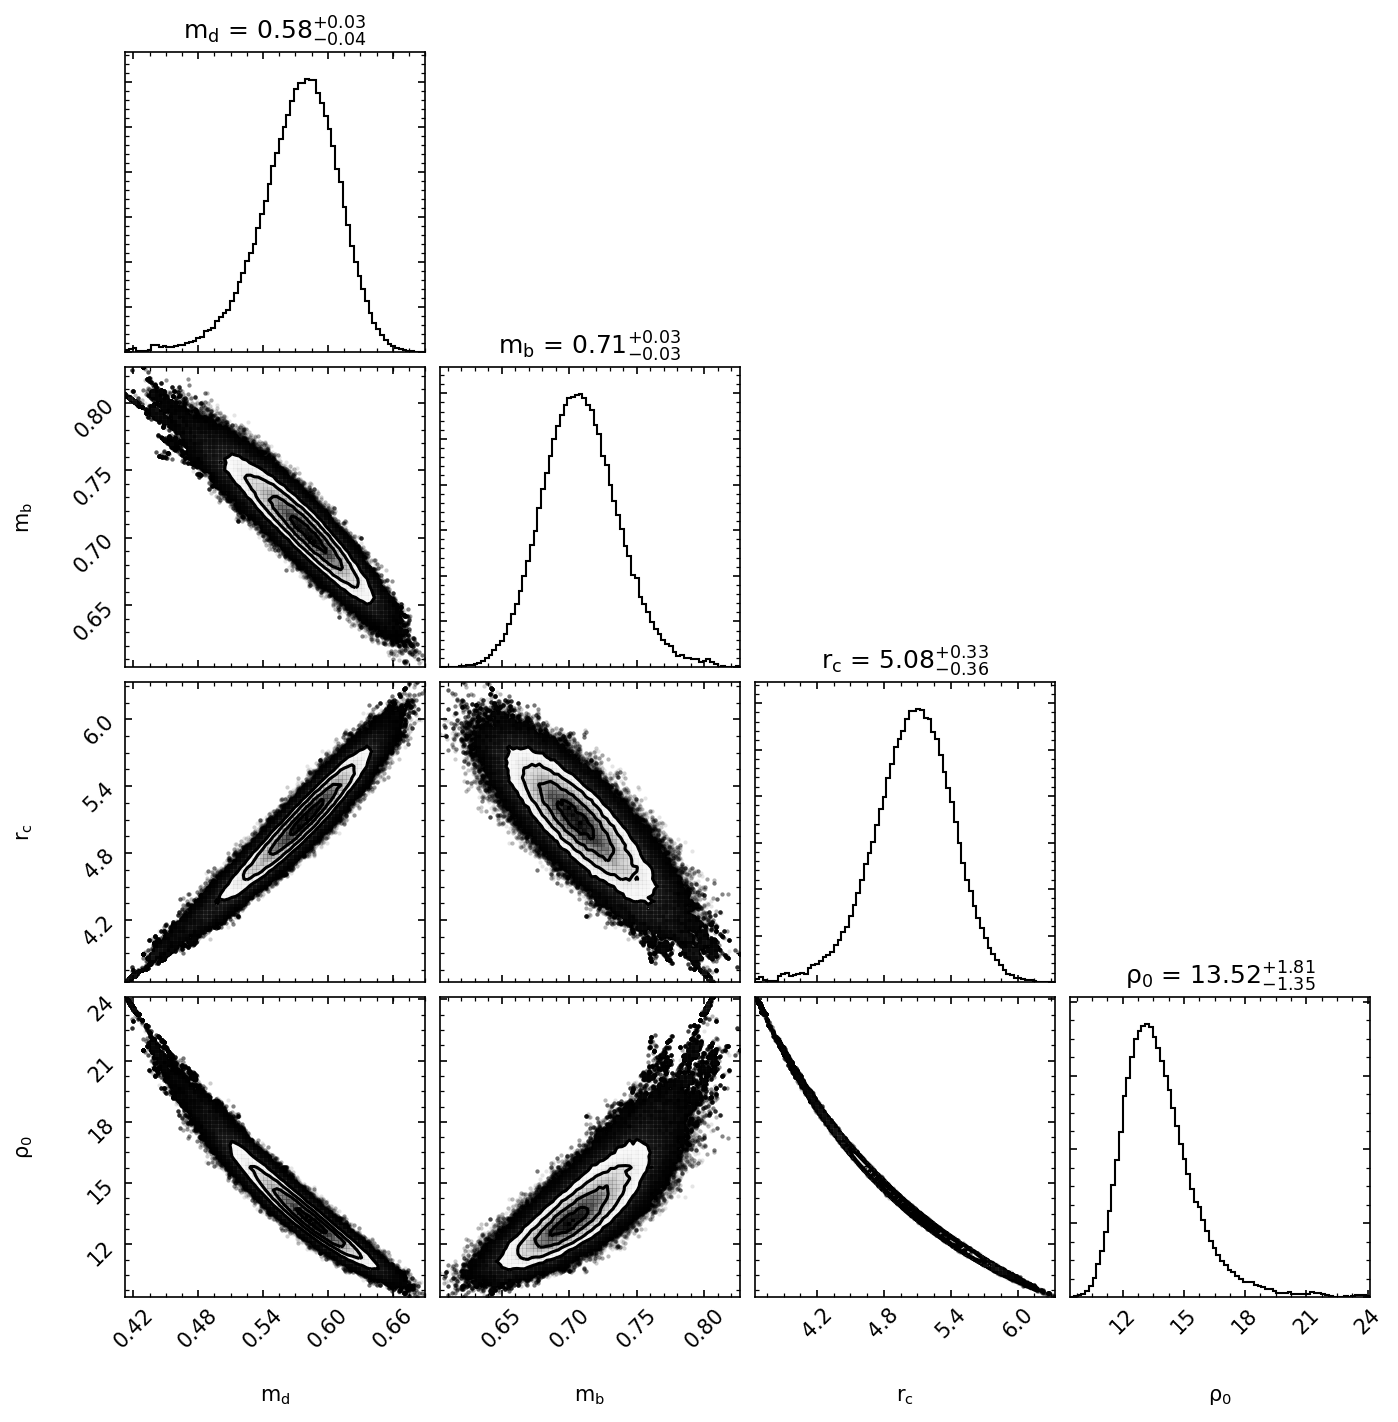

In [108]:
samples = sampler.get_chain(flat = True)
labels = [r'$\rm m_d$', r'$\rm m_b$', r'$\rm r_c$', r'$\rm \rho_{0}$']
fig = corner.corner(samples, bins = 80, show_titles = True, labels = labels, plot_datapoints = True)

### $\texttt{Fixed disk case - ISO}$

In [112]:
import emcee
import corner
import numpy as np
import pylab as pl
from scipy.optimize import minimize
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] =  True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

r, V_obs, Vg, Vd, Vb = np.loadtxt('velocities.txt', unpack = True)
app, rec = np.loadtxt('a_ringlog2.txt'), np.loadtxt('r_ringlog2.txt')
v_err = np.abs(app[:, 2] - rec[:, 2])

mg = 1.4
md, mb = 1., 1.          #initial mass-to-light ratios
rc, rho = 15, 2.4      #initial core radius and density [kpc.....Msun/pc^3]


def log_likelihood(theta, r, V_obs):# v_err):
    
    rc, rho = theta
    
    V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
    V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) +  mb*Vb*np.abs(Vb) + V_u**2)
        
    return -0.5*np.sum(((V_obs - V_t))**2) #/v_err)**2) #+ np.log(2.*np.pi*v_err**2))


initial = np.array([rc, rho])

def log_prior(theta):
    
    rc, rho = theta
    
    V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
    V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) +  mb*Vb*np.abs(Vb) + V_u**2)
    
    if (0 < rc < 30) and (0.0 < rho < 50):\
        
        return 0.0
    
    return -np.inf

def log_probability(theta, x, y):#, yerr):
    
    lp = log_prior(theta)
    
    if not np.isfinite(lp):
        
        return -np.inf
    
    return lp + log_likelihood(theta, r, V_obs)#, v_err)

pos = initial + np.random.rand(150, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (r, V_obs), a = 2)
p0 = sampler.run_mcmc(pos, 75)
print('burn-in phase done.......')

sampler.reset()
sampler.run_mcmc(p0, 10000, progress = True)
print('production done.........')

  0%|          | 10/10000 [00:00<01:47, 93.02it/s]

burn-in phase done.......


100%|██████████| 10000/10000 [01:26<00:00, 115.13it/s]

production done.........


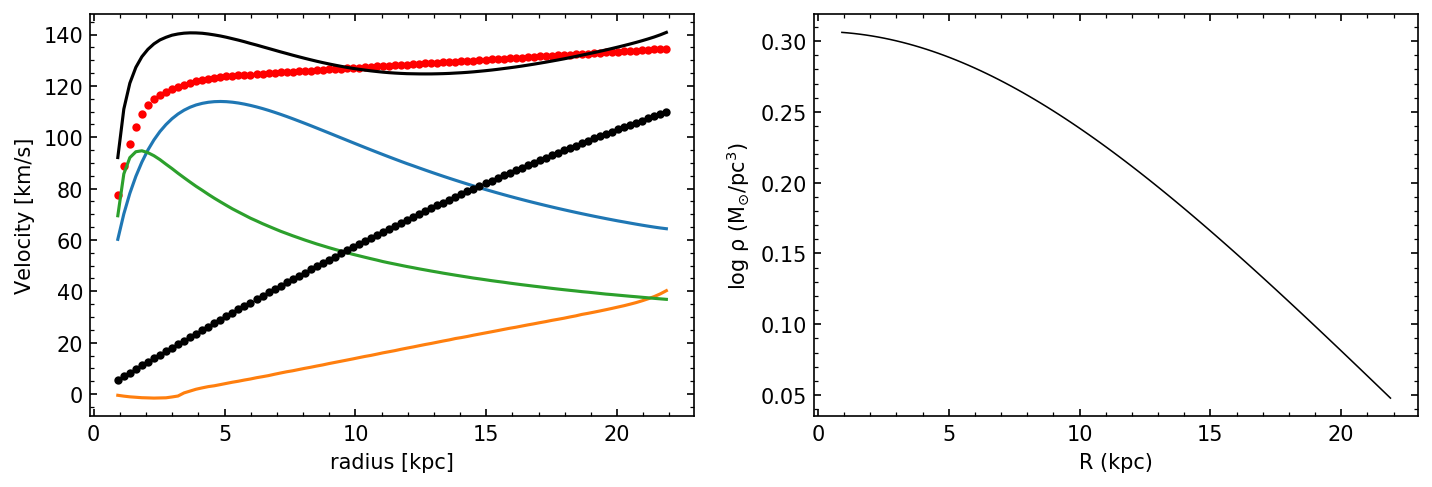

Theta max:  [24.23411376  2.02655072]


In [114]:
samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]

rc, rho = theta_max

V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) + mb*Vb*np.abs(Vb) + V_u**2)

pl.subplot(221)
pl.plot(r, V_obs, 'r.')#, yerr = v_err, fmt = '.', color = 'maroon', ecolor = 'maroon', elinewidth = .75, capsize = 1.)
pl.plot(r, md*Vd)
pl.plot(r, Vg)
pl.plot(r, mb*Vb)
pl.plot(r, V_t, 'k-')
pl.plot(r, V_u, 'k.')
pl.ylabel('Velocity [km/s]')
pl.xlabel('radius [kpc]')
#pl.text(3, 190, r'm$\rm _d$ = ' +str(np.round(theta_max[0], 2)))
#pl.text(3, 175, r'm$\rm _b$ = ' +str(np.round(theta_max[1], 2)))
#pl.text(7, 190, r'R$\rm _c$ = ' +str(np.round(theta_max[1], 2)))
#pl.text(7, 175, r'$\rm \rho_0$ = '+str(np.round(theta_max[2], 2)))

pl.subplot(222)                             #plotting density profiles

rho_iso = rho*(1 + (r/rc)**2)**-1
pl.plot(r, np.log10(rho_iso), 'k-', linewidth = .75)
#pl.text(18.5, 1.5, r'$\rm R_c = $'+str(np.round(rc,2))+ ' ' + 'kpc', color = 'r', fontdict = {'size': 'small'})
#pl.text(18.5, 1.4, r'$\rm \rho_o = $'+str(np.round(rho, 2)), fontdict = {'size': 'small'})
pl.xlabel('R (kpc)')
pl.ylabel(r'$\rm log\ \rho\   (M_{\odot}/pc^{3})$')


pl.subplots_adjust(right = 1.6, top = 1.6)
pl.show()
print('Theta max: ',theta_max)

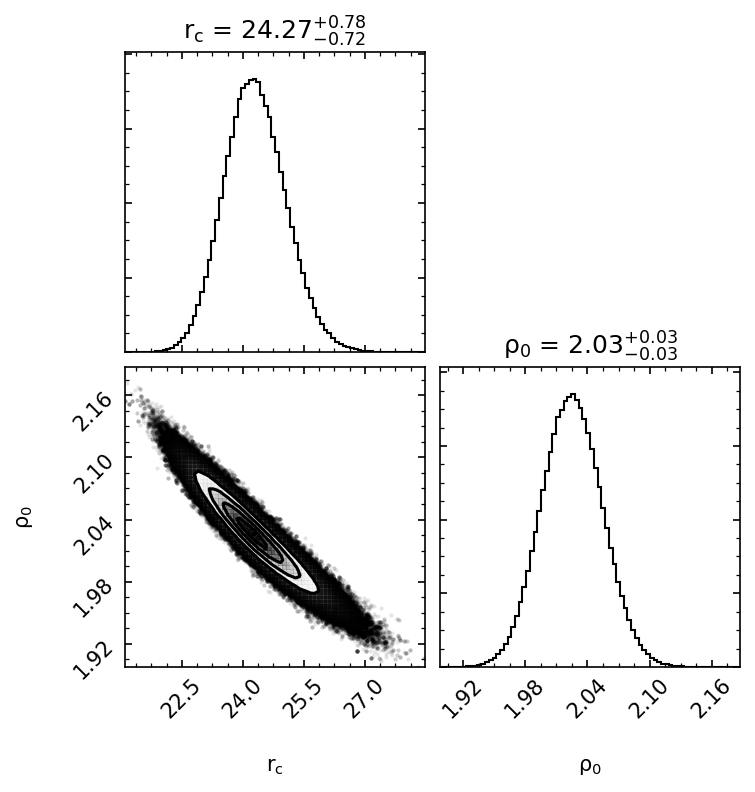

In [115]:
samples = sampler.get_chain(flat = True)
labels = [r'$\rm r_c$', r'$\rm \rho_{0}$']
fig = corner.corner(samples, bins = 80, show_titles = True, labels = labels, plot_datapoints = True)

###  $\texttt{Fitting polyex curve}$

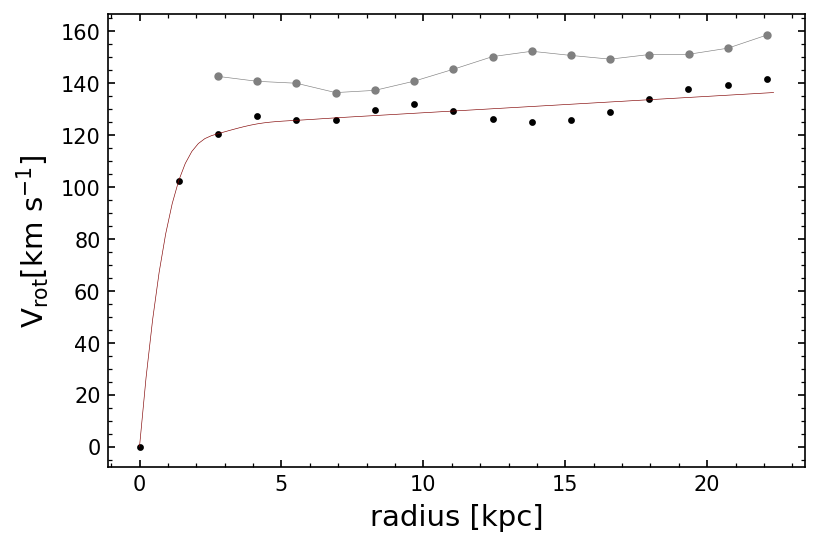

In [24]:
import numpy as np
import pylab as pl
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import matplotlib as mpl
from matplotlib.patches import Ellipse
import pvextractor as pv_ex
from spectral_cube import SpectralCube
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.interpolate import InterpolatedUnivariateSpline


mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] =  True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

r, V_obs = np.loadtxt('pv_velocities.txt', unpack = True)

file = np.loadtxt('velocity_file.txt')
#app, rec = np.loadtxt('a_ringlog2.txt'), np.loadtxt('r_ringlog2.txt')
#v_err = np.abs(app[:, 2] - rec[:, 2])


mg = 1.4
md, mb = .78, .8         #initial mass-to-light ratios
rc, rho = 1.64, 50.5      #initial core radius and density [kpc.....Msun/pc^3]


'''
interpolating disk, bulge and error
velocities
'''


init_vals = [125.59, 1.3, 0.03]    #for polyex fitting


def polyex_model(r, V_0, r_pe, alpha):
    
    '''
    function to fit the polyex curve on
    rotation curve
    '''
    return V_0*(1 - np.exp(-r/r_pe))*(1 + alpha*r/r_pe)

best_params, cov = curve_fit(polyex_model, r, V_obs, p0 = init_vals)

V_pol = polyex_model(r, *best_params)


#V_u = np.sqrt((4.*np.pi*rho*4.321*rc**2)*(1 - (rc/r)*np.arctan(r/rc)))    #pseudo-iso vels
#V_t = np.sqrt(mg*Vg*np.abs(Vg) + md*Vd*np.abs(Vd) +  mb*Vb*np.abs(Vb) + V_u**2)

ring2_b = np.loadtxt('ringlog2.txt')                               #both
r_interp = (np.arange(0, 485.05464737, 5)/206265)*9.5e3

V_pol_interp = InterpolatedUnivariateSpline(r, V_pol)
Vpol_new = V_pol_interp(r_interp)

pl.plot(ring2_b[:,0], ring2_b[:, 2], ls = '-', marker = '.', color = 'grey', linewidth = .3)
pl.plot(r[:17], V_obs[:17], ls = '', marker = '.', color = 'k', markersize = 4.5)#, yerr = v_err_int, fmt = '.', color = 'maroon', ecolor = 'maroon', elinewidth = .75, capsize = 1.)
pl.plot(r_interp, Vpol_new, ls = '-', color = 'maroon', linewidth = .3)
pl.xlabel('radius [kpc]', fontsize = 14)
pl.ylabel(r'$\rm V_ {rot} [km\ s^{-1}]$', fontsize = 14)
pl.savefig('polyex.png', format = 'png', dpi = 150)
pl.show()